# Modern Ecommerce Stock/Portfolio Analysis

***

## Part 1 - Intial Libraries and Data

### 1.1 - Import Libraries

In [117]:
# Importing Libraries
import os
import requests
import yfinance as yf # Used to grab the stock prices with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns # Used for Heatmap Visualization
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi # Used with the Monte Carlo simulation library
from utils.MCForecastTools import MCSimulation
import hvplot.pandas # Used for visualization
from bokeh.models.formatters import NumeralTickFormatter # Used for yformatter in plot

### 1.2 - Initial Data

In [118]:
# List of Stocks Tickers
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")

In [119]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.80
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.52
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.54
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.59
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.80
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3563.87
Current Amazon Investment Value: 218937.8302002703
Current Walmart Price: 148.73
Current Walmart Investment Value: 152512.30516817063
Current Ebay Price: 73.87
Current Ebay Investment Value: 258829.71268395238
Current Target Price: 254.03
Current Target Investment Value: 319173.2629727353
Current Overstock Price: 101.59
Current Overstock Investment Value: 513080.8080808081


***

## Part 2 - Rate of Return Calculations

### 2.1 - Amazon Expected Rate of Return Calculations

#### Year 1

In [120]:
# Amazon Return calculations
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100
year1_ror_amazon

10.683739211985838

#### Year 2

In [121]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100
year2_ror_amazon

84.38039817859662

#### Year 3

In [122]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-05']

year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100
year3_ror_amazon


5.929861235231035

#### Expected Rate of Return based on 3 year period

In [123]:
# Expected rate of return
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3
expected_ror_amazon

33.664666208604494

### 2.2 - Walmart Expected Rate of Return Calculations

#### Year 1

In [124]:
# Walmart Return calculations
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100
year1_ror_wmt

17.95209348382286

#### Year 2

In [125]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100
year2_ror_wmt

22.82151654564294

#### Year 3

In [126]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-05']

year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100
year3_ror_wmt

6.3376575236515675

#### Expected Rate of Return based on 3 year period

In [127]:
# Expected rate of return 
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3
expected_ror_wmt

15.703755851039121

### 2.3 - Ebay Expected Rate of Return Calculations

#### Year 1

In [128]:
# Ebay Return calculations
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100
year1_ror_ebay

21.036579762867646

#### Year 2

In [129]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100
year2_ror_ebay

41.37552766005987

#### Year 3

In [130]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-05']

year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100
year3_ror_ebay

54.73519137935465

#### Expected Rate of Return based on 3 year period

In [131]:
# Expected rate of return
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3
expected_ror_ebay

39.04909960076072

### 2.4 - Target Expected Rate of Return Calculations

#### Year 1

In [132]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100
year2_ror_target

47.307620628610564

#### Year 2

In [133]:
# Target Return calculations
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100
year1_ror_target

33.37209829544403

#### Year 3

In [134]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-05']

year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100
year3_ror_target

62.60844855852912

#### Expected Rate of Return based on 3 year period

In [135]:
# Expected rate of return
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3
expected_ror_target

47.76272249419458

### 2.5 - Overstock Expected Rate of Return Calculations

#### Year 1

In [136]:
# Overstock Return calculations
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100
year1_ror_overstock

-49.34343374015091

#### Year 2

In [137]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100
year2_ror_overstock


583.3499774702757

#### Year 3

In [138]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-05']

year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100
year3_ror_overstock

52.40734999874773

#### Expected Rate of Return based on 3 year period

In [139]:
# Expected rate of return
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3
expected_ror_overstock

195.47129790962416

***

## Part 3 - Investment Values, Expected Rate of Return and Correlation Visualizatiions

### 3.1 - Investment Value Visualization

In [140]:
# Investment stocks series and creating data frame
investment_list = pd.Series(
    {
        "Current Amazon Investment Value": current_amazon_investment_value,
        "Current Walmart Investment Value": current_walmart_investment_value,
        "Current Ebay Investment Value": current_ebay_investment_value,
        "Current Target Investment Value": current_target_investment_value,
        "Current Overstock Investment Value": current_overstock_investment_value
    }
)

investment_values_df = pd.DataFrame(data=investment_list)
investment_values_df.T

,Current Amazon Investment Value,Current Walmart Investment Value,Current Ebay Investment Value,Current Target Investment Value,Current Overstock Investment Value
0,218937.8302,152512.305168,258829.712684,319173.262973,513080.808081


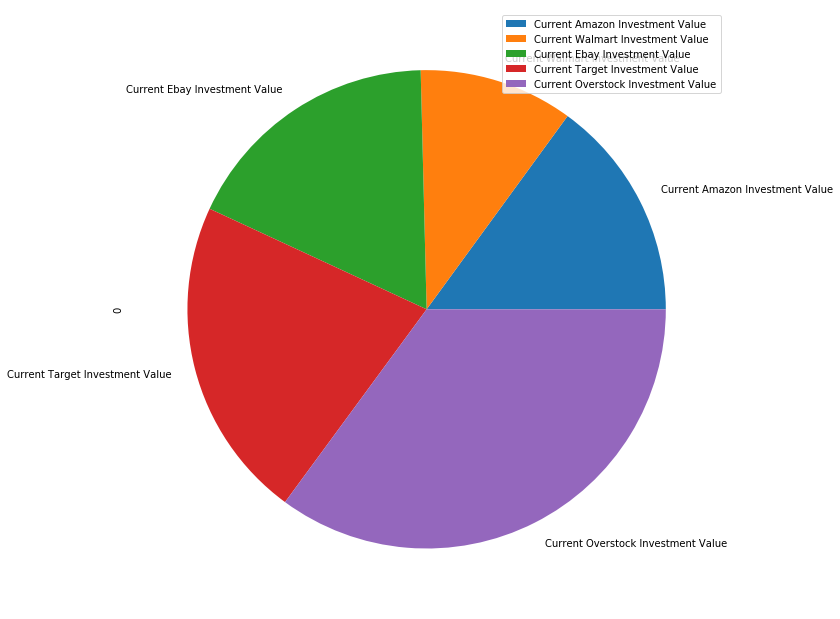

In [141]:
# Investment values Pie Chart
plot = investment_values_df.plot.pie(subplots=True, figsize=(15, 11))

### 3.2 - Closing Prices Visualization

In [142]:
# Stocks 3Y History Data
amazon_history = amazon.history(period = "3y")
walmart_history = walmart.history(period = "3y")
ebay_history = ebay.history(period = "3y")
target_history = target.history(period = "3y")
overstock_history = overstock.history(period = "3y")

In [143]:
# Start time and sotcks list
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-12,17.760000,79.702515,27.886227,98.428772,1636.849976
2018-11-13,17.790001,78.630127,27.058109,97.547485,1631.170044
2018-11-14,16.950001,77.520409,26.855900,96.211342,1599.010010
2018-11-15,17.530001,75.310356,27.125519,94.325592,1619.439941
2018-11-16,17.190001,74.303230,27.077374,92.572510,1593.410034
...,...,...,...,...,...
2021-11-04,104.889999,260.440002,76.279999,151.279999,3477.000000
2021-11-05,104.459999,254.270004,75.570000,150.229996,3518.989990
2021-11-08,105.360001,253.330002,73.760002,149.270004,3488.979980


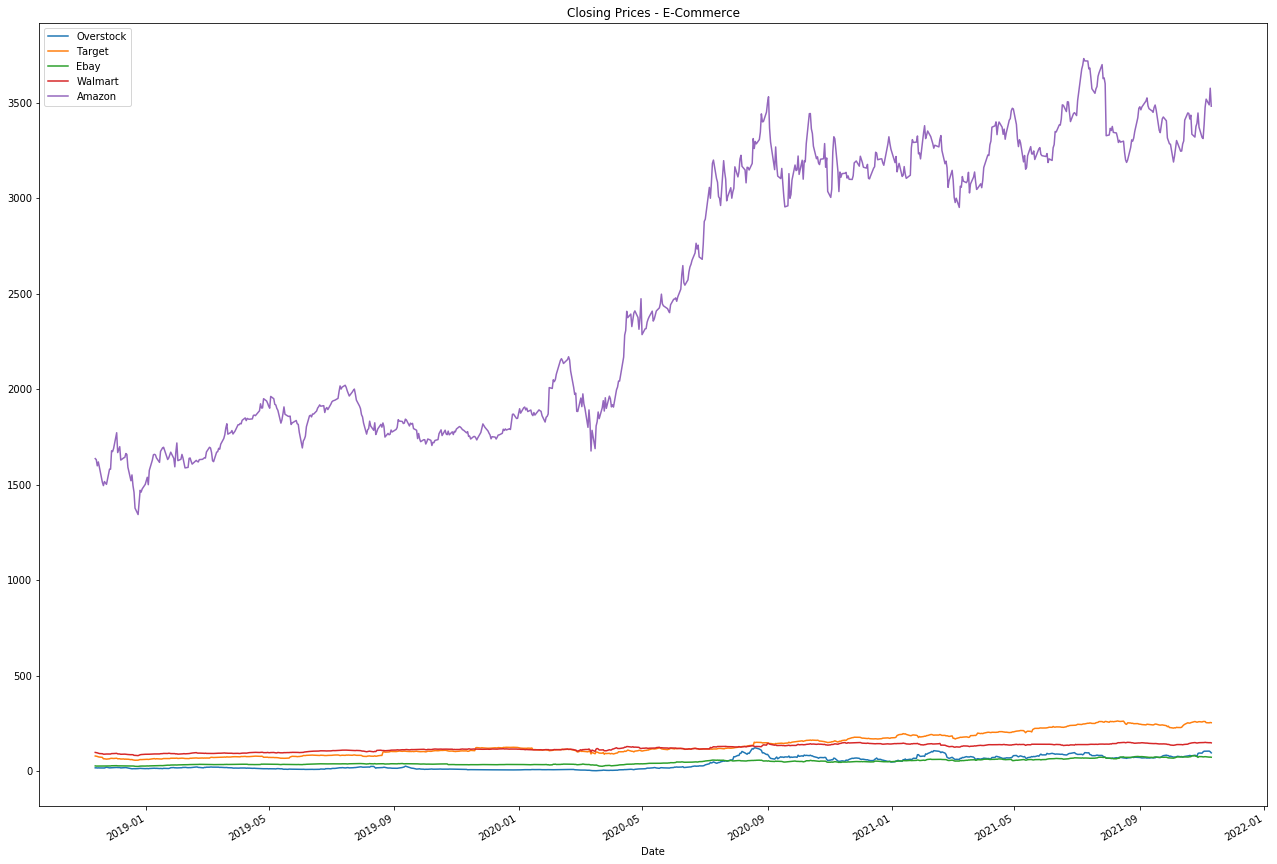

In [144]:
# Data frames and Plot
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])

dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)
dataframe.plot(figsize=(22,16), title=("Closing Prices - E-Commerce"))

### 3.3 - Correlation Calulations and Visualization

In [145]:
# Correlation of all stocks
corr_df = dataframe.corr(method='pearson') 

# Reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head()

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.827888,0.883063,0.805910,0.921182
Target,0.827888,1.000000,0.936259,0.896477,0.887567
Ebay,0.883063,0.936259,1.000000,0.851914,0.922318
Walmart,0.805910,0.896477,0.851914,1.000000,0.921331
Amazon,0.921182,0.887567,0.922318,0.921331,1.000000


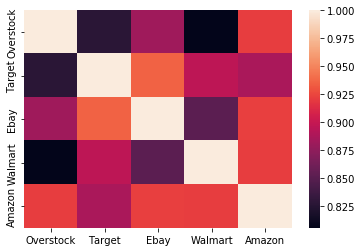

In [146]:
# Heatmap from the correlation values
sns.heatmap(corr_df)

***

## Part 4 - Portfolio Mean-Variance Calulations and Graph comparisons

### 4.1 - Mean-Variance Caluculations

#### Standard Deviation Calculation

In [147]:
# Variance calculations
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.3252099227868269

0.6062238373808981

0.14066511025599138

0.18686979790601568

7.230113332909765

#### Variance Function

In [148]:
# Variance function
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance

#### Overstock VS.

In [149]:
# 

ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

#### Target VS.

In [150]:
#

tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)

#### Ebay VS.

In [151]:
#

ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


#### Walmart VS.

In [152]:
#

walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

### 4.2 - Graph Comparisons

#### Dataframe Creation

In [153]:
#

overstock_vs = [ostk_to_target_variance, ostk_to_ebay_variance, ostk_to_walmart_variance]
ebay_vs = [tgt_to_ebay_variance, ostk_to_ebay_variance, ebay_to_walmart_variance]
target_vs = [tgt_to_ebay_variance, tgt_to_walmart_variance,  ostk_to_target_variance]
walmart_vs =[ostk_to_walmart_variance, ebay_to_walmart_variance, tgt_to_walmart_variance]
amazon_vs = [ostk_to_amazon_variance, ebay_to_amazon_variance,tgt_to_amazon_variance, walmart_to_amazon_variance]

overstock_vs_dataframe = pd.DataFrame(overstock_vs)
ebay_vs_dataframe = pd.DataFrame(ebay_vs)
target_vs_dataframe = pd.DataFrame(target_vs)
walmart_vs_dataframe = pd.DataFrame(walmart_vs)
amazon_vs_dataframe = pd.DataFrame(amazon_vs)

overstock_vs_dataframe = overstock_vs_dataframe.set_axis(['Target', 'Ebay', 'Walmart',], axis='index')
ebay_vs_dataframe = ebay_vs_dataframe.set_axis(['Target', 'Overstock', 'Walmart',], axis='index')
target_vs_dataframe = target_vs_dataframe.set_axis(['Ebay', 'Walmart', 'Overstock'], axis='index')
walmart_vs_dataframe = walmart_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target',], axis='index')
amazon_vs_dataframe = amazon_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target','Walmart'], axis='index')

#### Plot Creation

In [154]:
#

overstock_vs_plot = overstock_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Overstock Vs.",
    color = "#C9412E",
    yformatter = "%.3f"
)

ebay_vs_plot = ebay_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Ebay Vs.",
    color = "#DED02C",
    yformatter = "%.3f"
)

target_vs_plot = target_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Target Vs.",
    color = "#3CCF3E",
    yformatter = "%.3f"
)

walmart_vs_plot = walmart_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Walmart Vs.",
    color = "#1961E6",
    yformatter = "%.3f"
)

amazon_vs_plot = amazon_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Amazon Vs.",
    color = "#923DD5",
    yformatter = "%.3f"
)

#### Display Graphs

In [155]:
overstock_vs_plot + ebay_vs_plot + target_vs_plot + walmart_vs_plot 

:Layout
   .Bars.Overstock_Vs_full_stop :Bars   [index]   (0)
   .Bars.Ebay_Vs_full_stop      :Bars   [index]   (0)
   .Bars.Target_Vs_full_stop    :Bars   [index]   (0)
   .Bars.Walmart_Vs_full_stop   :Bars   [index]   (0)

In [156]:
amazon_vs_plot

:Bars   [index]   (0)

***

## Part 5 - Monte Carlo Simulation of the Portfolio

### 5.1 - Alpaca Data Collection

In [157]:
# Load the environment variables from the .env file

load_dotenv("/Users/johannmaiga/Downloads/MyFiles/FinTech Class/.api_keys")

True

In [158]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [159]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AMZN", "WMT", "EBAY", "TGT", "OSTK"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
start = pd.Timestamp("2018-11-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-11-04", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [160]:
# Creating a data frame from the gathered data
ecom_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
ecom_stocks.index = ecom_stocks.index.date
ecom_stocks.head()

NameError: name 'alpaca' is not defined

### 5.2 - Monte Carlo Simulation Run

In [98]:
# Configuring the MC simulation
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
one_year_simulation.portfolio_data.dropna()

NameError: name 'ecom_stocks' is not defined

In [ ]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns
one_year_simulation.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
one_year_simulation.plot_simulation()

### 5.3 - Plot the Simulated Daily Returns Trajectory for `Ecom Portfolio` over the Next Year (252 Trading Days)

In [ ]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(one_year_simulation.simulated_return.mean(axis=1)),
    "median": list(one_year_simulation.simulated_return.median(axis=1)),
    "min": list(one_year_simulation.simulated_return.min(axis=1)),
    "max": list(one_year_simulation.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

In [ ]:
# Use the `plot` function to visually analyze the trajectory of the Ecom Portfolio daily returns on a 252 trading day simulation
df_simulated_returns.plot(figsize=(15,12), title="Simulated Daily Returns Behavior of the Ecom Portfolio Over the Next Year")

### 5.4 - Calculate the Simulated Profits/Losses of $500,000 Investment in `Ecom Portfolio` Over the Next `252` Trading Days

In [ ]:
# Set initial investment
initial_investment = 500000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(figsize=(15,12), title="Simulated Outcomes Behavior of Ecom Portfolio Over the Next Year")

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = one_year_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000 investments in Ecom Portfolio
ci_lower = round(tbl[8]*500000,2)
ci_upper = round(tbl[9]*500000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $500,000 in the portfolio"
    f" over the next year will end within in the range of"
    f" ${ci_lower} and ${ci_upper}.")

***